<a href="https://colab.research.google.com/github/malmusfer/fuel_consumption/blob/master/fuel_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1><center>Simple Linear Regression</center></h1>


<h4>About this Notebook</h4>
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


<h1 id="understanding_data">Understanding the Data</h1>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [2]:
!wget https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2019%20Fuel%20Consumption%20Ratings.csv

--2020-08-14 13:58:54--  https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2019%20Fuel%20Consumption%20Ratings.csv
Resolving www.nrcan.gc.ca (www.nrcan.gc.ca)... 198.103.48.143
Connecting to www.nrcan.gc.ca (www.nrcan.gc.ca)|198.103.48.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354937 (347K) [text/csv]
Saving to: ‘MY2019 Fuel Consumption Ratings.csv’

MY2019 Fuel Consump 100%[===================>] 346.62K  1.08MB/s    in 0.3s    

2020-08-14 13:58:55 (1.08 MB/s) - ‘MY2019 Fuel Consumption Ratings.csv’ saved [354937/354937]



In [50]:
df = pd.read_csv("MY2019FuelConsumptionRatings.csv", encoding="ISO-8859-1")
# take a look at the dataset
df.head()

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26,252,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26,258,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#Let lower the columns for better performance 
df.columns = map(str.lower, df.columns)
df.head()

,model,make,model.1,vehicle class,engine size,cylinders,transmission,fuel,fuel consumption,unnamed: 9,unnamed: 10,unnamed: 11,co2 emissions,co2,smog,unnamed: 15,unnamed: 16,unnamed: 17,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22,unnamed: 23,unnamed: 24,unnamed: 25,unnamed: 26,unnamed: 27,unnamed: 28,unnamed: 29,unnamed: 30,unnamed: 31,unnamed: 32,unnamed: 33,unnamed: 34,unnamed: 35,unnamed: 36,unnamed: 37,unnamed: 38,unnamed: 39,...,unnamed: 181,unnamed: 182,unnamed: 183,unnamed: 184,unnamed: 185,unnamed: 186,unnamed: 187,unnamed: 188,unnamed: 189,unnamed: 190,unnamed: 191,unnamed: 192,unnamed: 193,unnamed: 194,unnamed: 195,unnamed: 196,unnamed: 197,unnamed: 198,unnamed: 199,unnamed: 200,unnamed: 201,unnamed: 202,unnamed: 203,unnamed: 204,unnamed: 205,unnamed: 206,unnamed: 207,unnamed: 208,unnamed: 209,unnamed: 210,unnamed: 211,unnamed: 212,unnamed: 213,unnamed: 214,unnamed: 215,unnamed: 216,unnamed: 217,unnamed: 218,unnamed: 219,unnamed: 220
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26,252,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26,258,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#also, lets rename the column
df.rename({'model': 'model_year',
           'model.1': 'model_type',
           'vehicle class': 'vehicle_class',
           'engine size': 'engine_size_l',
           'fuel': 'fuel_type',
           'fuel consumption': 'fuel_consumption_city',
           'unnamed: 9': 'fuel_consumption_hwy',
           'unnamed: 10': 'fuel_consumption_comp',
           'unnamed: 11': 'fuel_consumption_comp_mpg',
           'co2 emissions' : 'co2_emissions',
           'co2': 'co2_rating',
           'smog': 'smog_rating'}, axis=1, inplace=True)

In [53]:
df.head()

,model_year,make,model_type,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comp,fuel_consumption_comp_mpg,co2_emissions,co2_rating,smog_rating,unnamed: 15,unnamed: 16,unnamed: 17,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22,unnamed: 23,unnamed: 24,unnamed: 25,unnamed: 26,unnamed: 27,unnamed: 28,unnamed: 29,unnamed: 30,unnamed: 31,unnamed: 32,unnamed: 33,unnamed: 34,unnamed: 35,unnamed: 36,unnamed: 37,unnamed: 38,unnamed: 39,...,unnamed: 181,unnamed: 182,unnamed: 183,unnamed: 184,unnamed: 185,unnamed: 186,unnamed: 187,unnamed: 188,unnamed: 189,unnamed: 190,unnamed: 191,unnamed: 192,unnamed: 193,unnamed: 194,unnamed: 195,unnamed: 196,unnamed: 197,unnamed: 198,unnamed: 199,unnamed: 200,unnamed: 201,unnamed: 202,unnamed: 203,unnamed: 204,unnamed: 205,unnamed: 206,unnamed: 207,unnamed: 208,unnamed: 209,unnamed: 210,unnamed: 211,unnamed: 212,unnamed: 213,unnamed: 214,unnamed: 215,unnamed: 216,unnamed: 217,unnamed: 218,unnamed: 219,unnamed: 220
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26,252,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26,258,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#choose the right dataframe range
df2=df.iloc[1:, 1:15]
df2.head()

,make,model_type,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comp,fuel_consumption_comp_mpg,co2_emissions,co2_rating,smog_rating
1,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6,3
2,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26,252,4,3
3,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26,258,4,3
4,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3
5,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 1 to 1308
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   make                       1071 non-null   object 
 1   model_type                 1050 non-null   object 
 2   vehicle_class              1050 non-null   object 
 3   engine_size_l              1050 non-null   object 
 4   cylinders                  1050 non-null   float64
 5   transmission               1050 non-null   object 
 6   fuel_type                  1050 non-null   object 
 7   fuel_consumption_city      1050 non-null   object 
 8   fuel_consumption_hwy       1050 non-null   object 
 9   fuel_consumption_comp      1050 non-null   object 
 10  fuel_consumption_comp_mpg  1050 non-null   object 
 11  co2_emissions              1050 non-null   object 
 12  co2_rating                 1050 non-null   object 
 13  smog_rating                1050 non-null   objec

In [56]:
#let change the datatype to the right representation
df2['engine_size_l'] = df2['engine_size_l'].astype(float)
df2['fuel_consumption_city'] = df2['fuel_consumption_city'].astype(float)
df2['fuel_consumption_hwy'] = df2['fuel_consumption_hwy'].astype(float)
df2['fuel_consumption_comp'] = df2['fuel_consumption_comp'].astype(float)
df2['fuel_consumption_comp_mpg'] = df2['fuel_consumption_comp_mpg'].astype(float)
df2['co2_emissions'] = df2['co2_emissions'].astype(float)
df2['co2_rating'] = df2['co2_rating'].astype(float)
df2['smog_rating'] = df2['smog_rating'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 1 to 1308
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   make                       1071 non-null   object 
 1   model_type                 1050 non-null   object 
 2   vehicle_class              1050 non-null   object 
 3   engine_size_l              1050 non-null   float64
 4   cylinders                  1050 non-null   float64
 5   transmission               1050 non-null   object 
 6   fuel_type                  1050 non-null   object 
 7   fuel_consumption_city      1050 non-null   float64
 8   fuel_consumption_hwy       1050 non-null   float64
 9   fuel_consumption_comp      1050 non-null   float64
 10  fuel_consumption_comp_mpg  1050 non-null   float64
 11  co2_emissions              1050 non-null   float64
 12  co2_rating                 1050 non-null   float64
 13  smog_rating                1050 non-null   float

In [83]:
#lets drop the Nan value for better performing the regression
df3= df2.dropna()

<h1 id="data_exploration">Data Exploration</h1>
Lets first have a descriptive exploration on our data.

In [57]:
# summarize the data
df2.describe()

,engine_size_l,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comp,fuel_consumption_comp_mpg,co2_emissions,co2_rating,smog_rating
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000
mean,3.104571,5.589524,12.368190,9.032095,10.86419,27.657143,251.173333,4.560000,4.140000
std,1.315254,1.796110,3.293952,2.049522,2.69715,7.316003,57.012002,1.651391,1.791416
min,1.000000,3.000000,4.200000,4.000000,4.10000,13.000000,96.000000,1.000000,1.000000
25%,2.000000,4.000000,10.200000,7.600000,9.10000,23.000000,212.000000,3.000000,3.000000
50%,3.000000,6.000000,12.000000,8.800000,10.60000,27.000000,248.000000,4.000000,5.000000
75%,3.600000,6.000000,14.300000,10.200000,12.50000,31.000000,289.000000,5.000000,5.000000
max,8.000000,16.000000,26.800000,17.200000,22.20000,69.000000,522.000000,10.000000,7.000000


Lets select some features to explore more.

In [84]:
cdf = df3[['engine_size_l','cylinders','fuel_consumption_comp','co2_emissions']]
cdf.head()

,engine_size_l,cylinders,fuel_consumption_comp,co2_emissions
1,2.4,4.0,8.6,199.0
2,3.5,6.0,10.8,252.0
3,3.5,6.0,11.0,258.0
4,3.0,6.0,9.0,210.0
5,3.5,6.0,11.0,261.0


we can plot each of these features:

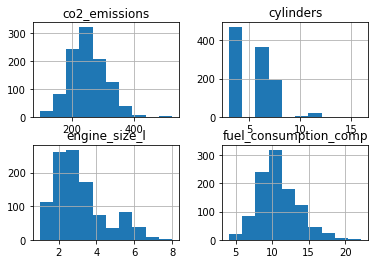

In [85]:
viz = cdf[['engine_size_l','cylinders','fuel_consumption_comp','co2_emissions']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

Text(0, 0.5, 'Emission')

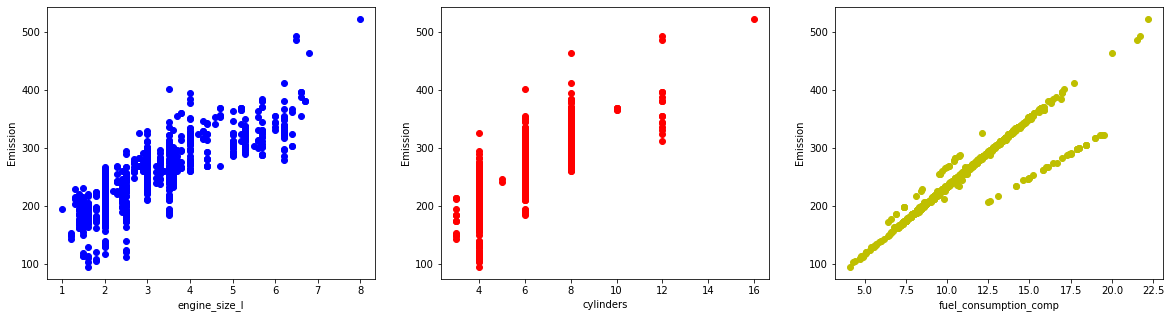

In [86]:
plt.figure(figsize= [20,5])
# engine_size_l vs the Emission
plt.subplot(1, 3, 1) # 1 row, 1 cols, subplot 1
plt.scatter(cdf.engine_size_l, cdf.co2_emissions,  color='b');
plt.xlabel("engine_size_l")
plt.ylabel("Emission")

# cylinders vs the Emission
plt.subplot(1, 3, 2) # 1 row, 2 cols, subplot 2
plt.scatter(cdf.cylinders, cdf.co2_emissions,  color='r');
plt.xlabel("cylinders")
plt.ylabel("Emission")

# fuel_consumption_comp vs the Emission
plt.subplot(1, 3, 3) # 1 row, 3 cols, subplot 3
plt.scatter(cdf.fuel_consumption_comp, cdf.co2_emissions,  color='y')
plt.xlabel("fuel_consumption_comp")
plt.ylabel("Emission")

##Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, we train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [88]:
msk = np.random.rand(len(df3)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h1 id="simple_regression">Simple Regression Model</h1>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

## Train data distribution

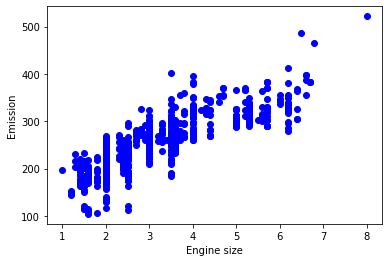

In [90]:
plt.scatter(train.engine_size_l, train.co2_emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Modeling
Using sklearn package to model data.

In [93]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['engine_size_l']])
train_y = np.asanyarray(train[['co2_emissions']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[36.00787681]]
Intercept:  [139.95958922]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


## Plot outputs

we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

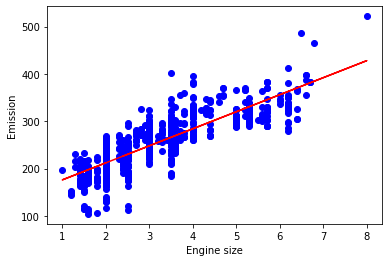

In [94]:
plt.scatter(train.engine_size_l, train.co2_emissions,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [95]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['engine_size_l']])
test_y = np.asanyarray(test[['co2_emissions']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.81
Residual sum of squares (MSE): 947.34
R2-score: 0.53
